# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

Sample_reviews = [    "TI ❤️👍 NLP and text analysis! 😃 This is a great course. 👌",    
                  "The service was terrible. I would not recommend it to anyone.",    
                  "The food was okay. Nothing special.",   
                  "I love this brand. Their products are always top quality.",    
                  "I just tried the new 🍕 from that new place in town and it was 😋👌! The crust was perfectly crispy and the toppings were fresh and delicious. 🙌🏼 Highly recommend!"]

# Preprocessing the data
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

processed_docs = [preprocess(doc) for doc in Sample_reviews]

# Creating the dictionary and corpus
dictionary = gensim.corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Building the LDA model
coherence_scores = []
for num_topics in range(2, 10):
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       update_every=1,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=processed_docs,
                                         dictionary=dictionary,
                                         coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    print(f'Number of topics: {num_topics}, Coherence Score: {coherence_lda:.4f}')

# Choosing the optimal number of topics based on coherence score
optimal_num_topics = np.argmax(coherence_scores) + 2
print(f'Optimal Number of Topics: {optimal_num_topics}')

# Final LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=optimal_num_topics,
                                   random_state=42,
                                   update_every=1,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# Printing the topics
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)
for topic in topics:
    print(f'Topic {topic[0]}: {[word[0] for word in topic[1]]}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of topics: 2, Coherence Score: 0.3896
Number of topics: 3, Coherence Score: 0.4438
Number of topics: 4, Coherence Score: 0.4924
Number of topics: 5, Coherence Score: 0.5061
Number of topics: 6, Coherence Score: 0.5087
Number of topics: 7, Coherence Score: 0.5202
Number of topics: 8, Coherence Score: 0.5216
Number of topics: 9, Coherence Score: 0.5266
Optimal Number of Topics: 9
Topic 0: ['recommend', 'anyone', 'would', 'terrible', 'service', 'analysis', 'course', 'great', 'text', 'okay']
Topic 1: ['course', 'recommend', 'great', 'okay', 'text', 'service', 'food', 'nothing', 'analysis', 'special']
Topic 2: ['okay', 'great', 'text', 'always', 'food', 'recommend', 'course', 'products', 'analysis', 'service']
Topic 3: ['food', 'special', 'nothing', 'okay', 'recommend', 'text', 'analysis', 'service', 'products', 'great']
Topic 4: ['quality', 'love', 'brand', 'products', 'always', 'great', 'course', 'food', 'text', 'nothing']
Topic 5: ['okay', 'text', 'special', 'recommend', 'analysis

In [ ]:
# Visualize the topics
!pip install pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.180775  0.062658       1        1  37.278360
0      0.134451  0.138321       2        1  29.670048
4      0.040819 -0.154933       3        1  16.649939
3      0.014991 -0.061202       4        1  13.236297
5     -0.001897  0.003031       5        1   0.633077
1     -0.001897  0.003031       6        1   0.633075
2     -0.001897  0.003031       7        1   0.633071
6     -0.001897  0.003031       8        1   0.633070
7     -0.001897  0.003031       9        1   0.633064, topic_info=         Term      Freq     Total Category  logprob  loglift
5   recommend  1.000000  1.000000  Default  28.0000  28.0000
26       town  1.000000  1.000000  Default  27.0000  27.0000
20  delicious  1.000000  1.000000  Default  26.0000  26.0000
23  perfectly  1.000000  1.000000  Default  25.0000  25.0000
24      place  1.000000  1.000000  Default  24.0000  24.0000
..        ...       ...       ...      ...      ...      ...
22     highly  0.006557  1.089089   Topic9  -3.3322  -0.0503
19      crust  0.006557  1.089089   Topic9  -3.3322  -0.0503
27      tried  0.006557  1.089089   Topic9  -3.3322  -0.0503
25   toppings  0.006557  1.089089   Topic9  -3.3322  -0.0503
5   recommend  0.006557  1.799521   Topic9  -3.3322  -0.5524

[280 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
13        3  1.089017     always
0         2  0.967673   analysis
4         2  0.967673     anyone
14        3  1.089017      brand
1         2  0.967673     course
18        1  0.918199     crispy
19        1  0.918199      crust
20        1  0.918199  delicious
9         4  1.159071       food
21        1  0.918199      fresh
2         2  0.967673      great
22        1  0.918199     highly
15        3  1.089017       love
10        4  1.159071    nothing
11        4  1.159071       okay
23        1  0.918199  perfectly
24        1  0.918199      place
16        3  1.089017   products
17        3  1.089017    quality
5         1  0.555703  recommend
5         2  0.555703  recommend
6         2  0.967673    service
12        4  1.159071    special
7         2  0.967673   terrible
3         2  0.967673       text
25        1  0.918199   toppings
26        1  0.918199       town
27        1  0.918199      tried
8         2  0.967673      would, R=28, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 5, 4, 6, 2, 3, 7, 8])

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 2 Coherence Score: 0.4090001705287295
Number of Topics: 3 Coherence Score: 0.4138890479604931


/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 4 Coherence Score: 0.3981641678029278
Number of Topics: 5 Coherence Score: 0.4327756819910043


/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 6 Coherence Score: 0.39282340630111356
Number of Topics: 7 Coherence Score: 0.406593351604393


/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


Number of Topics: 8 Coherence Score: 0.39060711637104883
Number of Topics: 9 Coherence Score: 0.39201609602098064
Number of Topics: 10 Coherence Score: 0.41961518057480063


/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


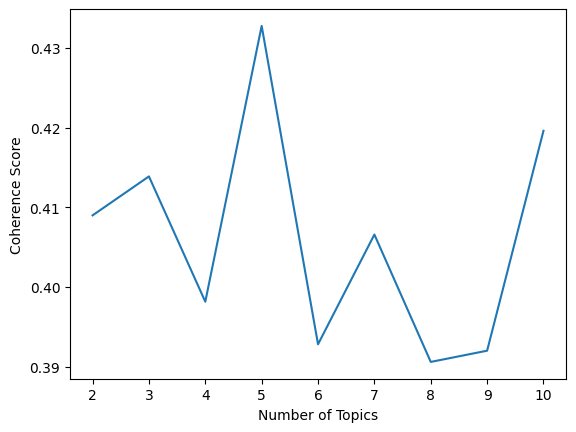

Best number of topics: 5
Topic: 0 
Words: -0.507*"new" + -0.281*"top" + -0.279*"recommend" + -0.254*"fresh" + -0.254*"delici"

Topic: 1 
Words: 0.408*"text" + 0.408*"analysi" + 0.408*"ti" + 0.408*"cours" + 0.408*"nlp"

Topic: 2 
Words: 0.407*"alway" + 0.407*"brand" + 0.407*"product" + 0.407*"qualiti" + 0.407*"love"

Topic: 3 
Words: 0.447*"servic" + 0.447*"anyon" + 0.447*"would" + 0.447*"terribl" + 0.399*"recommend"

Topic: 4 
Words: -0.500*"special" + -0.500*"food" + -0.500*"noth" + -0.500*"okay" + 0.000*"alway"



/usr/local/lib/python3.9/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [ ]:
# Import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Load data
Sample_reviews = [    "TI ❤️👍 NLP and text analysis! 😃 This is a great course. 👌",    
                  "The service was terrible. I would not recommend it to anyone.",    
                  "The food was okay. Nothing special.",   
                  "I love this brand. Their products are always top quality.",    
                  "I just tried the new 🍕 from that new place in town and it was 😋👌! The crust was perfectly crispy and the toppings were fresh and delicious. 🙌🏼 Highly recommend!"]

documents = Sample_reviews

# Prepare data
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

texts = []

for i in documents:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [token for token in tokens if token not in en_stop]
    stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute coherence score for each number of topics
coherence_scores = []
for num_topics in range(2, 11):
    model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Number of Topics: {num_topics} Coherence Score: {coherence_score}")

# Plot coherence score vs number of topics
plt.plot(range(2, 11), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

# Choose number of topics with highest coherence score
best_num_topics = range(2, 11)[coherence_scores.index(max(coherence_scores))]
print(f"Best number of topics: {best_num_topics}")

# Train LSA model with best number of topics
lsamodel = LsiModel(corpus=corpus, num_topics=best_num_topics, id2word=dictionary)

# Summarize topics
for idx, topic in lsamodel.print_topics(num_words=5):
    print(f'Topic: {idx} \nWords: {topic}\n')


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install Lda2Vec

In [ ]:

Sample_reviews = [    "TI ❤️👍 NLP and text analysis! 😃 This is a great course. 👌",    
                  "The service was terrible. I would not recommend it to anyone.",    
                  "The food was okay. Nothing special.",   
                  "I love this brand. Their products are always top quality.",    
                  "I just tried the new 🍕 from that new place in town and it was 😋👌! The crust was perfectly crispy and the toppings were fresh and delicious. 🙌🏼 Highly recommend!"]

# Preprocessing the data
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

processed_docs = [preprocess(doc) for doc in Sample_reviews]

# Creating the dictionary and corpus
dictionary = gensim.corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
# create an instance of the Lda2vec model
model = lda2Vec(n_documents=len(processed_docs), n_words=len(dictionary.token2id), n_hidden=100, n_topics=10)

# train the model and find the optimal number of topics using coherence score
model.fit(corpus, m=10, batch_size=128, epochs=20)
K = model.find_topics(corpus)


# prepare the topics
doc_weights = model.transform(corpus)
prepared_topics = model.prepare_topics(K, corpus)
top_words = []
for topic in prepared_topics:
    top_words.append([dictionary[i] for i, _ in topic])

#print the topics
for i, topic_words in enumerate(top_words):
    print(f"Topic {i+1}: {' '.join(topic_words)}")

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!pip install bertopic
from bertopic import BERTopic


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bertopic import BERTopic

Sample_reviews = [    "TI ❤️👍 NLP and text analysis! 😃 This is a great course. 👌",    
                  "The service was terrible. I would not recommend it to anyone.",    
                  "The food was okay. Nothing special.",   
                  "I love this brand. Their products are always top quality.",    
                  "I just tried the new 🍕 from that new place in town and it was 😋👌! The crust was perfectly crispy and the toppings were fresh and delicious. 🙌🏼 Highly recommend!"]

# Preprocessing the data
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in stop_words and len(token) > 3:
            result.append(token)
    return result

processed_docs = [preprocess(doc) for doc in Sample_reviews]

# initialize BERTopic model
model = BERTopic()

# fit the model on corpus
topics, _ = model.fit_transform(Sample_reviews)

# get the number of topics with the highest coherence score
top_n = 5
best_topics = model.get_best_topics(n=top_n)

# print the summaries of the top topics
for topic_id in best_topics:
    print(f"Topic {topic_id}: {model.get_topic(topic_id)}")


## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)



